In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_07c87c809f76416e8866730cc6bead46 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g2_LTVZubdJPuAANb4y29nkTr0w7NkcDU1xi5dZN7Ihr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_07c87c809f76416e8866730cc6bead46.get_object(Bucket='lifeexpectancyprediction-donotdelete-pr-du84wfqfkonzkp',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df1 = df.iloc[:,:].values

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df1[:,3:])
df1[:,3:] = imputer.transform(df1[:,3:])

In [11]:
df1 =pd.DataFrame(df1)
df1.columns = df.columns

In [12]:
df1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
X = df1.drop('Life expectancy ', axis = 1)
x_cols = X.columns
X = X.values
X

array([['Afghanistan', 2015, 'Developing', ..., 17.3, 0.479, 10.1],
       ['Afghanistan', 2014, 'Developing', ..., 17.5,
        0.47600000000000003, 10.0],
       ['Afghanistan', 2013, 'Developing', ..., 17.7, 0.47, 9.9],
       ...,
       ['Zimbabwe', 2002, 'Developing', ..., 1.3, 0.42700000000000005,
        10.0],
       ['Zimbabwe', 2001, 'Developing', ..., 1.7, 0.42700000000000005,
        9.8],
       ['Zimbabwe', 2000, 'Developing', ..., 11.2, 0.434, 9.8]],
      dtype=object)

In [14]:
y = df1['Life expectancy ']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
X[:,0] = encoder.fit_transform(X[:,0])
X[:,2] = encoder.fit_transform(X[:,2])

In [17]:
X = pd.DataFrame(X)
X.columns = x_cols

In [18]:
y = y.astype('int')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2350, 21)
Training Labels Shape: (2350,)
Testing Features Shape: (588, 21)
Testing Labels Shape: (588,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
pred1 = model1.predict(X_test)

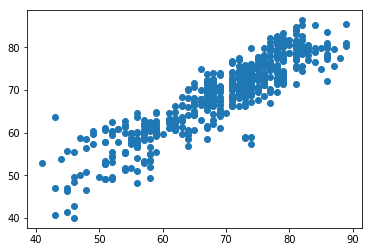

In [24]:
plt.scatter(y_test,pred1)

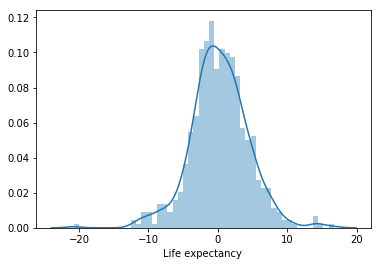

In [25]:
sns.distplot((y_test-pred1),bins=50)

In [26]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 30, random_state = 40)
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [27]:
pred2 = model2.predict(X_test)

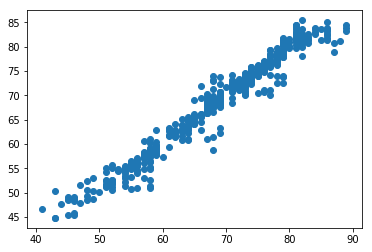

In [28]:
plt.scatter(y_test,pred2)

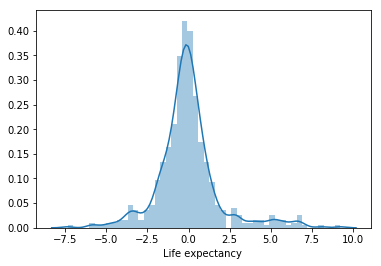

In [29]:
sns.distplot((y_test-pred2),bins=50)

In [30]:
print("R² score for Linear Regression Model: ", end='')
print(r2_score(pred1, y_test))
print("R² score for RandomForest Regression Model: ", end='')
print(r2_score(pred2, y_test))

R² score for Linear Regression Model: 0.7629240810655417
R² score for RandomForest Regression Model: 0.9591004141882411


In [31]:
print('MAE:', mean_absolute_error(y_test, pred2))
print('MSE:', mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred2)))

MAE: 1.2573129251700679
MSE: 3.7406594860166296
RMSE: 1.934078459116028


In [32]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [33]:
wml_credentials={
  "apikey": "s8y8iujKIU4Yp0Gpa0GCCJeW2VYi65viMG2qV2UQhaq9",
  "iam_apikey_description": "Auto-generated for key bfed9624-7960-433e-8246-84065fe705bd",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/f69c66dba660431eac4a575ea9480d28::serviceid:ServiceId-c63f0953-93c3-461e-ae6b-cd2595e83b54",
  "instance_id": "94aa20e0-edd3-42db-85f4-6be2322cf9f6",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [34]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [35]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'life expectancy data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Saurav',
    client.repository.ModelMetaNames.NAME:"linear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [36]:
model_details=client.repository.store_model(model2,meta_props=metadata)

In [37]:
published_model_uid=client.repository.get_model_uid(model_details)

In [38]:
published_model_uid

'b4531fa1-e4ee-4b7f-9811-908acc9c0101'

In [39]:
created_deployment=client.deployments.create(published_model_uid,name="LR")



#######################################################################################

Synchronous deployment creation for uid: 'b4531fa1-e4ee-4b7f-9811-908acc9c0101' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='32dcbf15-464d-4ac4-9420-b5798e1cbcfb'
------------------------------------------------------------------------------------------------




In [40]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/94aa20e0-edd3-42db-85f4-6be2322cf9f6/deployments/32dcbf15-464d-4ac4-9420-b5798e1cbcfb/online'

In [41]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
32dcbf15-464d-4ac4-9420-b5798e1cbcfb  LR    online  DEPLOY_SUCCESS  2020-06-28T14:10:48.819Z  scikit-learn-0.20  model
0d4b40e5-973c-424f-8f96-a6772b04ec36  LR    online  DEPLOY_SUCCESS  2020-06-18T10:55:21.443Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
